<a href="https://colab.research.google.com/github/SeanPatrickHurley/MLE_S25/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

## Question 1

First, we will import the CIFAR-10 Dataset, reshaping out data into vectors


In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Now, we will use a similar method to the one I used in exam 2, to print the first instance of each image, iterating through the training data until we hit one of each target value

<ipython-input-3-3d90c8fd039c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(classes[int(y_train[int(index_tracker[i])])])


airplane


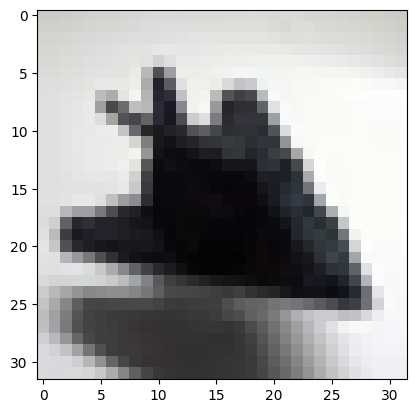

automobile


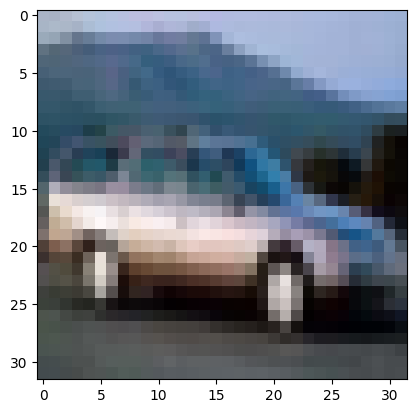

bird


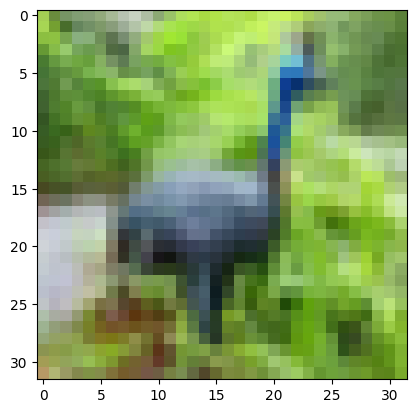

cat


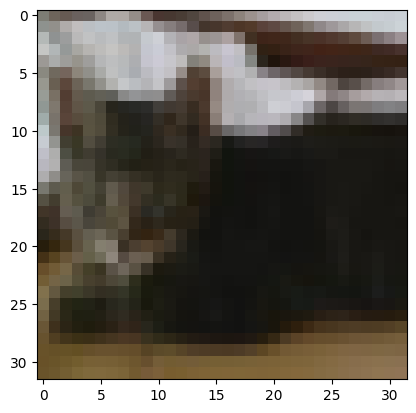

deer


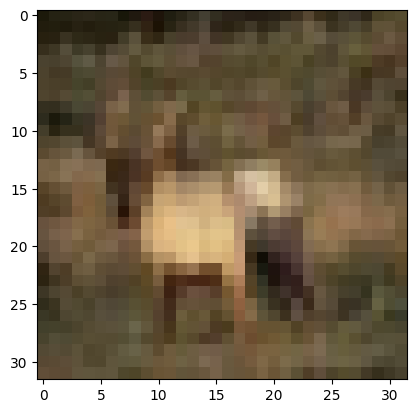

dog


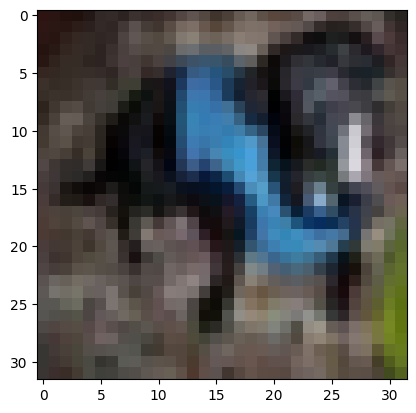

frog


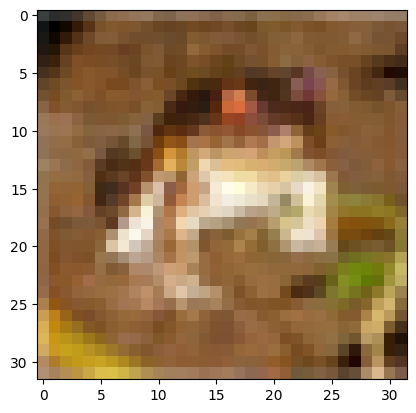

horse


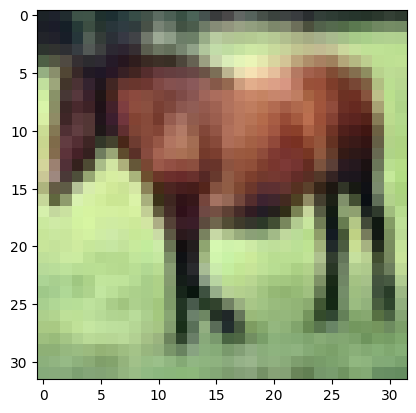

ship


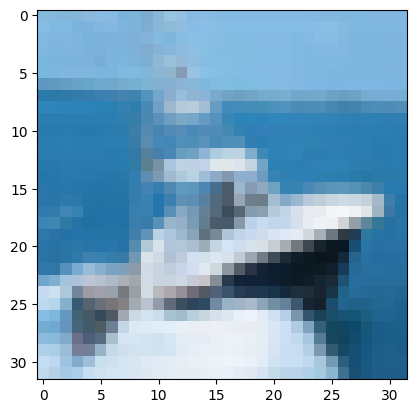

truck


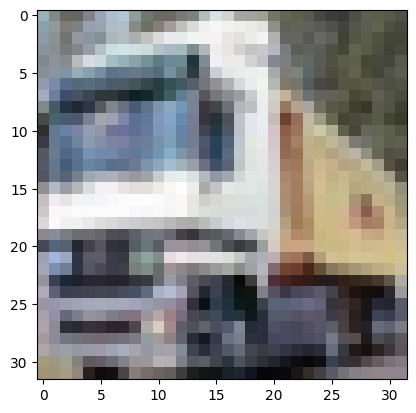

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

index_tracker = np.zeros(10) #Empty array to hold the first indicies of each class (values of 0 to 9)
index_tracker = index_tracker - 1 #Null values that aren't 0 to 9

for i in range(len(index_tracker)):
  j = 0 #Dummy index we will increase over time, but reset between loops
  while True: #We will manually break the loop, so set as always True
    if y_train[j] != i: #We need to increment along is failure
     j += 1
    else: #Success, we found the value we wanted (location of image with target 'i', with index j)
      index_tracker[i] = j #Assign j so we can look up images after
      break

for i in range(len(index_tracker)):
  plt.imshow(x_train[int(index_tracker[i])])
  print(classes[int(y_train[int(index_tracker[i])])])
  plt.show()

First, we use the in class example code to get an initial training and validation accuracy

In [ ]:
#First we import our libriaries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#Flatten images
x_train = x_train.reshape(50000, 32**2*3)
x_test = x_test.reshape(10000, 32**2*3)

#Converts to one-hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#Now we make our initial, unoptimized model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(512, input_shape=(32**2*3,)))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))


model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,634 (6.67 MB)

 Trainable params: 1,748,634 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.1472 - loss: 15.2393 - val_accuracy: 0.2759 - val_loss: 2.0101
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.2691 - loss: 2.0157 - val_accuracy: 0.3240 - val_loss: 1.8780
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.3215 - loss: 1.8695 - val_accuracy: 0.2982 - val_loss: 1.9115
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.3346 - loss: 1.8151 - val_accuracy: 0.3605 - val_loss: 1.8343
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.3673 - loss: 1.7633 - val_accuracy: 0.3618 - val_loss: 1.7732
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.3776 - loss: 1.7315 - val_accuracy: 0.3899 - val_loss: 1.7012
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.3850 - loss: 1.7129 - val_accuracy: 0.3843 - val_loss: 1.7038
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.3773 

Now, we plot our results of the unoptimized model. After rerunning many models with unoptimized Adam and varrying layer and neuron count, an asymptote of accuracy = ~40%

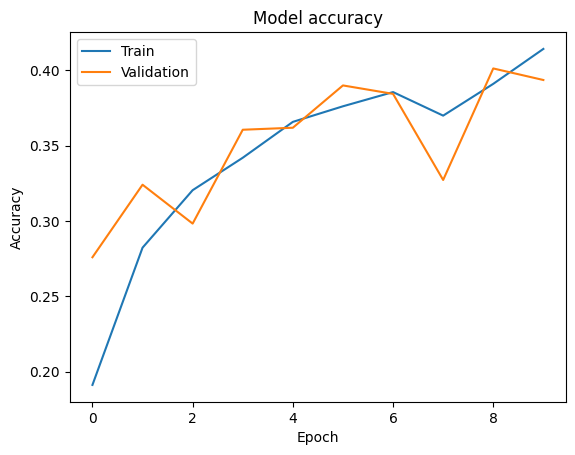

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Now, we will create a grid of hyperparameters for our unoptimized model, and iterate over them in a grid search

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

def create_model(learning_rate=0.001):
  model = Sequential()

  model.add(Dense(512, input_shape=(32**2*3,)))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(64))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(16))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(10, activation='softmax'))

  optimizer = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Define hyperparameter grid
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10],
    'learning_rate': [0.001, 0.0005, 0.0001] #0.001 is default
}

best_accuracy = 0
best_params = {}

In [ ]:
# Manual grid search
for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for learning_rate in param_grid['learning_rate']:
            # Create and train model
            model = create_model(learning_rate=learning_rate)
            history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                                validation_split=0.3)  # Set verbose=0 to suppress output

            # Evaluate model
            _, accuracy = model.evaluate(x_test, y_test)

            print(f"Batch size: {batch_size}, Epochs: {epochs}, Learning rate: {learning_rate}, Accuracy: {accuracy}")

            # Update best accuracy and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'learning_rate': learning_rate}

# Print results
print("Best accuracy:", best_accuracy)
print("Best hyperparameters:", best_params)

# Train the best model and plot results (if needed)
best_model = create_model(learning_rate=best_params['learning_rate'])
history = best_model.fit(x_train, y_train, epochs=best_params['epochs'],
                        batch_size=best_params['batch_size'],
                        validation_split=0.3)

Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 59s 26ms/step - accuracy: 0.1597 - loss: 7.8373 - val_accuracy: 0.2250 - val_loss: 2.1158
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 0.2697 - loss: 2.0179 - val_accuracy: 0.2895 - val_loss: 1.9368
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 77s 26ms/step - accuracy: 0.2904 - loss: 3.3087 - val_accuracy: 0.1338 - val_loss: 2.2621
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.2312 - loss: 2.1018 - val_accuracy: 0.2699 - val_loss: 1.9717
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.2861 - loss: 2.1009 - val_accuracy: 0.1965 - val_loss: 2.4153
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.2297 - loss: 2.1369 - val_accuracy: 0.2207 - val_loss: 2.2841
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.2935 - loss: 1.9135 - val_accuracy: 0.3080 - val_loss: 2.0423
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.2313 -

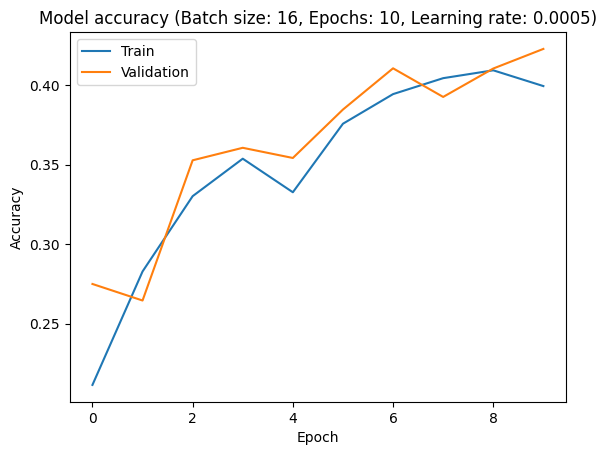

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"Model accuracy (Batch size: {best_params['batch_size']}, Epochs: {best_params['epochs']}, Learning rate: {best_params['learning_rate']})")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Varying batch size and learning rate for Adam on a dense, fully connected leaky relu activated neural net did not cause a significant change in the maximum accuracy. To check if this is just an issue of low epoch count, we will run the model longer.

In [ ]:
# Train the best model and plot results (if needed)
best_model = create_model(learning_rate=best_params['learning_rate'])
history = best_model.fit(x_train, y_train, epochs=100, #Manually increasing epochs
                        batch_size=best_params['batch_size'],
                        validation_split=0.3)

Epoch 1/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 56s 24ms/step - accuracy: 0.1494 - loss: 5.1315 - val_accuracy: 0.2102 - val_loss: 2.0656
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.2629 - loss: 2.0006 - val_accuracy: 0.3257 - val_loss: 1.8497
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - accuracy: 0.3284 - loss: 1.8507 - val_accuracy: 0.3181 - val_loss: 1.9071
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.3530 - loss: 1.7878 - val_accuracy: 0.3515 - val_loss: 1.8068
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.3687 - loss: 1.7541 - val_accuracy: 0.3652 - val_loss: 1.7766
Epoch 6/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.3893 - loss: 1.6951 - val_accuracy: 0.3964 - val_loss: 1.6746
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.4013 - loss: 1.6559 - val_accuracy: 0.3349 - val_loss: 1.8864
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 

Now, we will plot the result of the 100 epochs of the ideal model

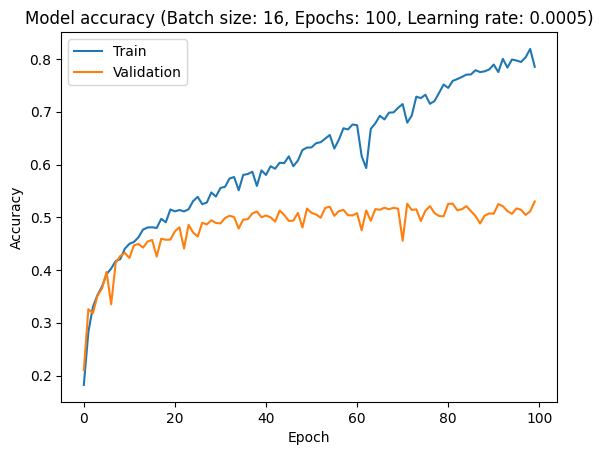

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"Model accuracy (Batch size: {best_params['batch_size']}, Epochs: {100}, Learning rate: {best_params['learning_rate']})")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

From the above graph, we can see that when running the model for 100 epochs, we do see an increase in model accuracy, but the validation accuracy plateaus around 50%. This means that even with our best model we cannot achieve significant accuracies with a fully connected neural net, we need a convolution neural net since we are classifying images.

## Question 2

First, we import the required Nasa Airfoil Dataset

In [ ]:
import pandas as pd

# URL of the dataset (Updated URL)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

# Load dataset into a Pandas DataFrame
column_names = ["Frequency", "Angle of Attack", "Chord Length", "Free-stream Velocity", "Suction Side Displacement", "Sound Pressure Level"]
df = pd.read_csv(url, sep="\t", names=column_names)

In [ ]:
print(df)
labels = df.columns
print(labels[-1])

      Frequency  Angle of Attack  Chord Length  Free-stream Velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

      Suction Side Displacement  Sound Pressure Level  
0                      0.002663               126.201  
1                      

Now, we will visualize the data using seaborn, as done in previous assignments

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#First, we normalize just the sound pressure level to help us visualize it, as it is the target here.
df_plot = df.copy()
target = labels[-1]
target_min = df_plot[target].min()
target_max = df_plot[target].max()
df_plot[target] = (df_plot[target] - target_min) / (target_max - target_min)
df_plot[target].shape

(1503,)

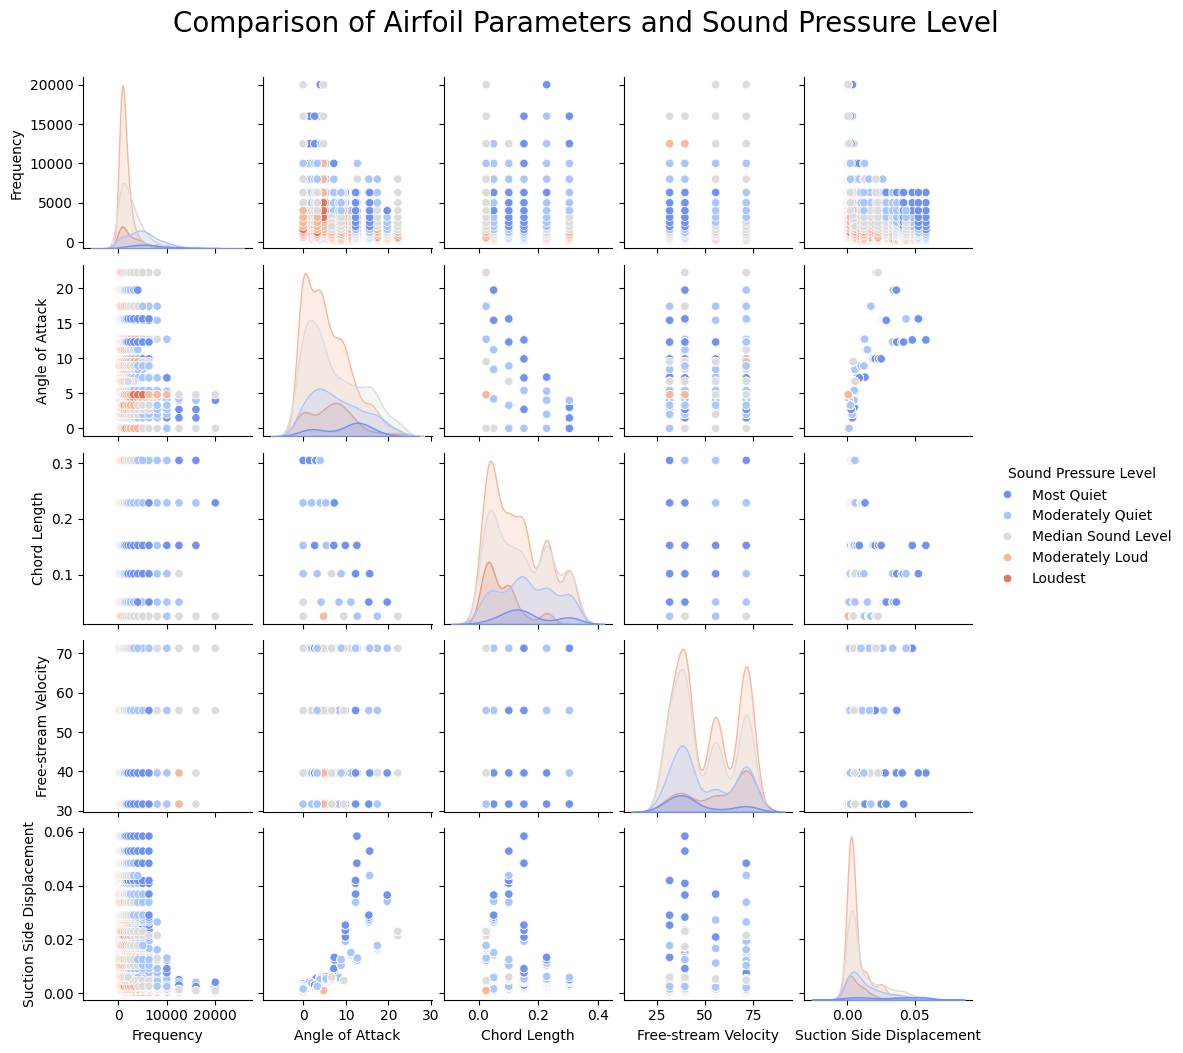

In [ ]:
#Now that the data is normalized, we can use it to give a color gradient to our data, rather than needed a 3D searborn scatterplot
dummy_names = ['Most Quiet', 'Moderately Quiet', 'Median Sound Level', 'Moderately Loud', 'Loudest']
hue_order = dummy_names #This ensures that the hues are in correct order

df_plot[target] = df_plot[target].apply(lambda x: dummy_names[int(x * 5 - 1e-4)]) #1e-4 stops from getting 10 as an index, which is out of bounds

palette = sns.color_palette("coolwarm", n_colors=5)

sns.pairplot(df_plot, vars=labels[:-1], hue=target, palette=palette, hue_order=hue_order, height=2)

plt.suptitle('Comparison of Airfoil Parameters and Sound Pressure Level', y=1.05, fontsize=20)
plt.show()

From the above visualization, we notice three key trends.

First, is that most data points are clustered around low Sound Pressure Levels, so they are not evenly distributed.

Second, is that Frequency and Angle of Attack, and Frequency and Suction Side Displacement, both offer the best predictors of Sound Pressure Levels.

Third, is that it is otherwise very difficult to clearly make qualitative predictions from the other 8 pairings of data

Now, we can construct out fully connected neural network.

In [ ]:
#First, we split our data into features, targets, training, and test data

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].to_numpy()

X = (X - X.mean(axis=0)) / X.std(axis=0)

y = df.iloc[:, -1].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) #random_state for reproducibility

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1052, 5)
y_train shape: (1052,)
X_val shape: (451, 5)
y_val shape: (451,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(5,)))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam',
              loss= 'mse',
              metrics=['mse', 'mae'])

model.summary()

history = model.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size=4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_121 (LeakyReLU)          │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_122 (LeakyReLU)          │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_123 (LeakyReLU)          │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,377 (521.00 KB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6756.7173 - mae: 66.2675 - mse: 6756.7173 - val_loss: 355.7937 - val_mae: 15.5095 - val_mse: 355.7937
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 312.6114 - mae: 14.0058 - mse: 312.6114 - val_loss: 216.8814 - val_mae: 12.1880 - val_mse: 216.8814
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 160.7509 - mae: 10.0259 - mse: 160.7509 - val_loss: 113.8933 - val_mae: 8.2420 - val_mse: 113.8933
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 87.6408 - mae: 7.4337 - mse: 87.6408 - val_loss: 61.0250 - val_mae: 6.1347 - val_mse: 61.0250
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 54.8969 - mae: 5.9303 - mse: 54.8969 - val_loss: 53.1239 - val_mae: 5.9014 - val_mse: 53.1239
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 40.8205 - mae: 5.0048 - mse: 40.8205 - val_loss: 37.2676 - val_mae: 4.6012 - val_mse: 37.2676
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - los

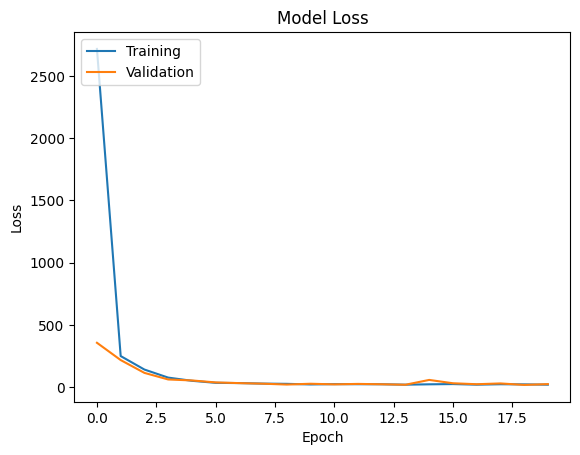

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)

r2 = r2_score(y_val, y_pred)
print(f"R-squared (R^2) on validation set: {r2}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R-squared (R^2) on validation set: 0.485557367589034


So, we get an R^2 value of ~50% on our first try. Now, we will use a grid sort similar to before to maximize R^2 value

In [ ]:
def create_model():
  model = Sequential()

  model.add(Dense(256, input_shape=(5,)))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(1, activation='linear'))

  optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])
  return model

# Define hyperparameter grid
param_grid = {
    'batch_size': [1, 4, 8],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'epochs': [10, 20, 30],
}

best_r2 = -1  # Initialize with a value less than any possible R^2
best_params = {}

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for learning_rate in param_grid['learning_rate']:
          model = create_model()
          history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)
          y_pred = model.predict(X_val)
          r2 = r2_score(y_val, y_pred)
          print(f"Batch size: {batch_size}, Epochs: {epochs}, Learning Rate: {learning_rate}, R^2: {r2}")

        if r2 > best_r2:
            best_r2 = r2
            best_params = {'batch_size': batch_size, 'epochs': epochs, 'learning rate': learning_rate}

print("Best R^2:", best_r2)
print("Best hyperparameters:", best_params)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3578.5972 - mae: 40.3518 - mse: 3578.5972 - val_loss: 119.5790 - val_mae: 8.8437 - val_mse: 119.5790
Epoch 2/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 109.0034 - mae: 8.1674 - mse: 109.0034 - val_loss: 63.9484 - val_mae: 6.4377 - val_mse: 63.9484
Epoch 3/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 54.1225 - mae: 5.8096 - mse: 54.1225 - val_loss: 74.6508 - val_mae: 6.6355 - val_mse: 74.6508
Epoch 4/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 56.0153 - mae: 5.8402 - mse: 56.0153 - val_loss: 25.8667 - val_mae: 3.9951 - val_mse: 25.8667
Epoch 5/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 36.1369 - mae: 4.7801 - mse: 36.1369 - val_loss: 46.4693 - val_mae: 5.4202 - val_mse: 46.4693
Epoch 6/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 40.0284 - mae: 4.9065 - mse: 40.0284 - val_loss: 28.1516 - val_mae: 4.2165 - val_mse: 28.1516
Epoch 7/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 35.5115 - mae: 4.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4974.8232 - mae: 51.9528 - mse: 4974.8232 - val_loss: 242.8161 - val_mae: 12.2527 - val_mse: 242.8161
Epoch 2/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 190.9268 - mae: 10.9032 - mse: 190.9268 - val_loss: 111.2713 - val_mae: 8.4126 - val_mse: 111.2713
Epoch 3/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 90.1269 - mae: 7.4882 - mse: 90.1269 - val_loss: 58.6491 - val_mae: 6.0821 - val_mse: 58.6491
Epoch 4/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 48.6265 - mae: 5.5891 - mse: 48.6265 - val_loss: 35.3376 - val_mae: 4.7163 - val_mse: 35.3376
Epoch 5/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 32.6285 - mae: 4.3742 - mse: 32.6285 - val_loss: 48.2404 - val_mae: 5.7505 - val_mse: 48.2404
Epoch 6/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 33.5495 - mae: 4.4957 - mse: 33.5495 - val_loss: 20.3367 - val_mae: 3.5671 - val_mse: 20.3367
Epoch 7/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 24.8675 - mae:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 10528.4463 - mae: 94.2731 - mse: 10528.4463 - val_loss: 509.2131 - val_mae: 18.1314 - val_mse: 509.2131
Epoch 2/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 387.3178 - mae: 16.3367 - mse: 387.3178 - val_loss: 339.9357 - val_mae: 14.7657 - val_mse: 339.9357
Epoch 3/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 302.3171 - mae: 13.9439 - mse: 302.3171 - val_loss: 272.3225 - val_mae: 13.2771 - val_mse: 272.3225
Epoch 4/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 253.1751 - mae: 12.8879 - mse: 253.1751 - val_loss: 227.7454 - val_mae: 11.9358 - val_mse: 227.7454
Epoch 5/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 192.2685 - mae: 11.2115 - mse: 192.2685 - val_loss: 180.9801 - val_mae: 10.5892 - val_mse: 180.9801
Epoch 6/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 162.5290 - mae: 10.2391 - mse: 162.5290 - val_loss: 140.1354 - val_mae: 9.5256 - val_mse: 140.1354
Epoch 7/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3629.6799 - mae: 41.0661 - mse: 3629.6799 - val_loss: 149.3299 - val_mae: 9.7310 - val_mse: 149.3299
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 103.9693 - mae: 8.1992 - mse: 103.9693 - val_loss: 44.9400 - val_mae: 5.1170 - val_mse: 44.9400
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 45.8809 - mae: 5.2634 - mse: 45.8809 - val_loss: 46.5180 - val_mae: 5.0954 - val_mse: 46.5180
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 49.4318 - mae: 5.5902 - mse: 49.4318 - val_loss: 34.4458 - val_mae: 4.6127 - val_mse: 34.4458
Epoch 5/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 52.8492 - mae: 5.4983 - mse: 52.8492 - val_loss: 40.7873 - val_mae: 5.0229 - val_mse: 40.7873
Epoch 6/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 43.7165 - mae: 5.1340 - mse: 43.7165 - val_loss: 57.2312 - val_mae: 6.1604 - val_mse: 57.2312
Epoch 7/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 38.5368 - mae: 4.8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4724.1016 - mae: 49.9359 - mse: 4724.1016 - val_loss: 248.5688 - val_mae: 13.0562 - val_mse: 248.5688
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 187.5199 - mae: 10.7951 - mse: 187.5199 - val_loss: 130.3021 - val_mae: 8.9412 - val_mse: 130.3021
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 91.0559 - mae: 7.7291 - mse: 91.0559 - val_loss: 68.3436 - val_mae: 6.2429 - val_mse: 68.3436
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 45.9622 - mae: 5.4329 - mse: 45.9622 - val_loss: 43.9976 - val_mae: 5.4150 - val_mse: 43.9976
Epoch 5/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 32.1578 - mae: 4.4358 - mse: 32.1578 - val_loss: 23.1602 - val_mae: 3.7038 - val_mse: 23.1602
Epoch 6/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 26.0120 - mae: 3.9345 - mse: 26.0120 - val_loss: 41.1529 - val_mae: 4.9015 - val_mse: 41.1529
Epoch 7/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 30.8712 - mae:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 10773.9482 - mae: 94.8349 - mse: 10773.9482 - val_loss: 473.7726 - val_mae: 17.4735 - val_mse: 473.7726
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 404.9928 - mae: 16.3153 - mse: 404.9928 - val_loss: 361.1903 - val_mae: 15.2604 - val_mse: 361.1903
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 331.7293 - mae: 14.7439 - mse: 331.7293 - val_loss: 306.6115 - val_mae: 13.7667 - val_mse: 306.6115
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 263.1927 - mae: 13.2465 - mse: 263.1927 - val_loss: 239.6761 - val_mae: 12.3897 - val_mse: 239.6761
Epoch 5/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 216.7666 - mae: 11.9323 - mse: 216.7666 - val_loss: 213.0605 - val_mae: 11.4850 - val_mse: 213.0605
Epoch 6/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 163.3891 - mae: 10.2839 - mse: 163.3891 - val_loss: 169.7837 - val_mae: 10.2704 - val_mse: 169.7837
Epoch 7/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3423.5444 - mae: 39.2766 - mse: 3423.5444 - val_loss: 129.8577 - val_mae: 9.2222 - val_mse: 129.8577
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 104.2379 - mae: 8.2532 - mse: 104.2379 - val_loss: 65.7882 - val_mae: 6.2285 - val_mse: 65.7882
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 50.6957 - mae: 5.5004 - mse: 50.6957 - val_loss: 87.1357 - val_mae: 7.2899 - val_mse: 87.1357
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 58.2329 - mae: 6.0874 - mse: 58.2329 - val_loss: 79.6182 - val_mae: 6.7638 - val_mse: 79.6182
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 49.1775 - mae: 5.3113 - mse: 49.1775 - val_loss: 37.0468 - val_mae: 4.7552 - val_mse: 37.0468
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 59.8138 - mae: 5.9808 - mse: 59.8138 - val_loss: 25.0919 - val_mae: 4.0207 - val_mse: 25.0919
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 34.4611 - mae: 4.5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4877.0239 - mae: 50.8814 - mse: 4877.0239 - val_loss: 307.5679 - val_mae: 13.8916 - val_mse: 307.5679
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 209.0269 - mae: 11.7416 - mse: 209.0269 - val_loss: 217.0707 - val_mae: 11.6624 - val_mse: 217.0707
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 96.2279 - mae: 7.8042 - mse: 96.2279 - val_loss: 74.9818 - val_mae: 6.5945 - val_mse: 74.9818
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 48.0762 - mae: 5.4983 - mse: 48.0762 - val_loss: 30.4910 - val_mae: 4.1776 - val_mse: 30.4910
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 29.1860 - mae: 4.2535 - mse: 29.1860 - val_loss: 31.7094 - val_mae: 4.3638 - val_mse: 31.7094
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 25.1280 - mae: 3.8604 - mse: 25.1280 - val_loss: 30.4439 - val_mae: 4.4067 - val_mse: 30.4439
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 28.7116 - mae

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10805.7266 - mae: 95.3781 - mse: 10805.7266 - val_loss: 500.5131 - val_mae: 17.9800 - val_mse: 500.5131
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 379.3115 - mae: 15.7310 - mse: 379.3115 - val_loss: 347.2139 - val_mae: 15.0578 - val_mse: 347.2139
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 297.4461 - mae: 14.0541 - mse: 297.4461 - val_loss: 286.3414 - val_mae: 13.6675 - val_mse: 286.3414
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 266.8163 - mae: 13.0891 - mse: 266.8163 - val_loss: 227.1898 - val_mae: 12.2064 - val_mse: 227.1898
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 190.9265 - mae: 11.2240 - mse: 190.9265 - val_loss: 197.6573 - val_mae: 11.0997 - val_mse: 197.6573
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 147.8015 - mae: 9.8731 - mse: 147.8015 - val_loss: 150.6525 - val_mae: 9.9835 - val_mse: 150.6525
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6671.6406 - mae: 66.1948 - mse: 6671.6406 - val_loss: 350.6872 - val_mae: 14.4141 - val_mse: 350.6872
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 248.4464 - mae: 12.6552 - mse: 248.4464 - val_loss: 177.9037 - val_mae: 10.2692 - val_mse: 177.9037
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 150.5275 - mae: 9.7334 - mse: 150.5275 - val_loss: 111.6895 - val_mae: 8.1481 - val_mse: 111.6895
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 77.2795 - mae: 6.9670 - mse: 77.2795 - val_loss: 66.2157 - val_mae: 6.4138 - val_mse: 66.2157
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 52.4179 - mae: 5.6976 - mse: 52.4179 - val_loss: 38.7027 - val_mae: 4.9012 - val_mse: 38.7027
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 34.7218 - mae: 4.5631 - mse: 34.7218 - val_loss: 30.9455 - val_mae: 4.4099 - val_mse: 30.9455
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24.2355 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9539.7451 - mae: 86.5120 - mse: 9539.7451 - val_loss: 412.1176 - val_mae: 16.1603 - val_mse: 412.1176
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 357.4859 - mae: 15.2597 - mse: 357.4859 - val_loss: 290.6496 - val_mae: 13.6330 - val_mse: 290.6496
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 235.6753 - mae: 12.6922 - mse: 235.6753 - val_loss: 216.6175 - val_mae: 11.7520 - val_mse: 216.6175
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 173.9989 - mae: 10.6653 - mse: 173.9989 - val_loss: 154.3444 - val_mae: 9.9222 - val_mse: 154.3444
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 117.6424 - mae: 8.8726 - mse: 117.6424 - val_loss: 107.0179 - val_mae: 8.1800 - val_mse: 107.0179
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 90.1459 - mae: 7.4094 - mse: 90.1459 - val_loss: 72.5319 - val_mae: 6.8256 - val_mse: 72.5319
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 14989.0605 - mae: 122.1239 - mse: 14989.0605 - val_loss: 8166.1250 - val_mae: 89.3036 - val_mse: 8166.1250
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4323.7441 - mae: 58.6820 - mse: 4323.7441 - val_loss: 680.2634 - val_mae: 20.5355 - val_mse: 680.2634
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 603.3678 - mae: 19.1833 - mse: 603.3678 - val_loss: 497.0607 - val_mae: 18.0343 - val_mse: 497.0607
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 448.9659 - mae: 16.8550 - mse: 448.9659 - val_loss: 437.8591 - val_mae: 16.8139 - val_mse: 437.8591
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 375.5237 - mae: 15.4700 - mse: 375.5237 - val_loss: 399.9711 - val_mae: 16.0658 - val_mse: 399.9711
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 339.5571 - mae: 15.0943 - mse: 339.5571 - val_loss: 356.4247 - val_mae: 15.3084 - val_mse: 356.4247
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6718.0552 - mae: 66.3386 - mse: 6718.0552 - val_loss: 320.0166 - val_mae: 14.3655 - val_mse: 320.0166
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 266.1407 - mae: 13.1700 - mse: 266.1407 - val_loss: 179.2275 - val_mae: 10.5481 - val_mse: 179.2275
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 150.6441 - mae: 9.7531 - mse: 150.6441 - val_loss: 107.3472 - val_mae: 8.3813 - val_mse: 107.3472
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 94.5910 - mae: 7.8789 - mse: 94.5910 - val_loss: 78.5614 - val_mae: 6.8052 - val_mse: 78.5614
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.5250 - mae: 5.3637 - mse: 45.5250 - val_loss: 32.8221 - val_mae: 4.4969 - val_mse: 32.8221
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 30.0205 - mae: 4.4036 - mse: 30.0205 - val_loss: 32.0901 - val_mae: 4.2304 - val_mse: 32.0901
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25.7434 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9778.6592 - mae: 87.5943 - mse: 9778.6592 - val_loss: 453.1692 - val_mae: 17.1274 - val_mse: 453.1692
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 379.6350 - mae: 15.5990 - mse: 379.6350 - val_loss: 291.0986 - val_mae: 13.7121 - val_mse: 291.0986
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 237.8180 - mae: 12.3286 - mse: 237.8180 - val_loss: 205.3558 - val_mae: 11.3935 - val_mse: 205.3558
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 170.4387 - mae: 10.4833 - mse: 170.4387 - val_loss: 143.7056 - val_mae: 9.4906 - val_mse: 143.7056
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 120.9387 - mae: 8.6262 - mse: 120.9387 - val_loss: 100.7884 - val_mae: 8.0853 - val_mse: 100.7884
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 90.9323 - mae: 7.6590 - mse: 90.9323 - val_loss: 78.3249 - val_mae: 7.0379 - val_mse: 78.3249
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15099.3057 - mae: 122.5833 - mse: 15099.3057 - val_loss: 8219.2529 - val_mae: 89.5737 - val_mse: 8219.2529
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4270.3369 - mae: 59.2300 - mse: 4270.3369 - val_loss: 715.3918 - val_mae: 21.0679 - val_mse: 715.3918
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 583.3450 - mae: 19.2342 - mse: 583.3450 - val_loss: 545.3600 - val_mae: 18.6589 - val_mse: 545.3600
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 463.1153 - mae: 17.3505 - mse: 463.1153 - val_loss: 484.3300 - val_mae: 17.5924 - val_mse: 484.3300
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 443.7278 - mae: 17.0546 - mse: 443.7278 - val_loss: 428.7019 - val_mae: 16.4965 - val_mse: 428.7019
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 392.2473 - mae: 16.1884 - mse: 392.2473 - val_loss: 383.9088 - val_mae: 15.7435 - val_mse: 383.9088
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6681.2451 - mae: 65.9147 - mse: 6681.2451 - val_loss: 303.6513 - val_mae: 13.7573 - val_mse: 303.6513
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 240.4583 - mae: 12.6105 - mse: 240.4583 - val_loss: 171.7447 - val_mae: 10.5098 - val_mse: 171.7447
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 124.1824 - mae: 9.0374 - mse: 124.1824 - val_loss: 104.7930 - val_mae: 8.0537 - val_mse: 104.7930
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 83.8595 - mae: 7.3107 - mse: 83.8595 - val_loss: 99.5416 - val_mae: 8.1005 - val_mse: 99.5416
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 57.5372 - mae: 5.9230 - mse: 57.5372 - val_loss: 40.2320 - val_mae: 5.1290 - val_mse: 40.2320
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 37.4482 - mae: 4.8783 - mse: 37.4482 - val_loss: 35.7724 - val_mae: 4.7464 - val_mse: 35.7724
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.7896 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9290.3809 - mae: 84.7343 - mse: 9290.3809 - val_loss: 458.7778 - val_mae: 17.3394 - val_mse: 458.7778
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 374.6597 - mae: 15.2896 - mse: 374.6597 - val_loss: 293.9991 - val_mae: 13.8473 - val_mse: 293.9991
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 241.8537 - mae: 12.6641 - mse: 241.8537 - val_loss: 220.3372 - val_mae: 11.9865 - val_mse: 220.3372
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 156.5466 - mae: 10.1361 - mse: 156.5466 - val_loss: 141.4162 - val_mae: 9.4256 - val_mse: 141.4162
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 116.6843 - mae: 8.6208 - mse: 116.6843 - val_loss: 99.3651 - val_mae: 8.0890 - val_mse: 99.3651
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 87.5478 - mae: 7.6772 - mse: 87.5478 - val_loss: 70.8426 - val_mae: 6.7672 - val_mse: 70.8426
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 15002.8994 - mae: 122.2058 - mse: 15002.8994 - val_loss: 8415.5186 - val_mae: 90.7619 - val_mse: 8415.5186
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4538.2510 - mae: 60.4167 - mse: 4538.2510 - val_loss: 663.5450 - val_mae: 20.6364 - val_mse: 663.5450
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 569.3851 - mae: 19.1988 - mse: 569.3851 - val_loss: 485.0833 - val_mae: 17.7795 - val_mse: 485.0833
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 465.2817 - mae: 17.5126 - mse: 465.2817 - val_loss: 424.5980 - val_mae: 16.5904 - val_mse: 424.5980
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 419.5427 - mae: 16.4848 - mse: 419.5427 - val_loss: 393.4341 - val_mae: 15.9037 - val_mse: 393.4341
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 344.8803 - mae: 14.8949 - mse: 344.8803 - val_loss: 351.1144 - val_mae: 15.1860 - val_mse: 351.1144
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9835.7109 - mae: 89.2876 - mse: 9835.7109 - val_loss: 511.0809 - val_mae: 18.1250 - val_mse: 511.0809
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 399.9317 - mae: 16.2362 - mse: 399.9317 - val_loss: 315.5413 - val_mae: 14.1709 - val_mse: 315.5413
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 245.8607 - mae: 12.7918 - mse: 245.8607 - val_loss: 213.2290 - val_mae: 11.5189 - val_mse: 213.2290
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 180.2607 - mae: 10.8208 - mse: 180.2607 - val_loss: 144.6901 - val_mae: 9.6112 - val_mse: 144.6901
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 127.7406 - mae: 9.0258 - mse: 127.7406 - val_loss: 106.5894 - val_mae: 8.1316 - val_mse: 106.5894
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 82.4554 - mae: 7.3359 - mse: 82.4554 - val_loss: 78.8444 - val_mae: 7.1297 - val_mse: 78.8444
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 67.9899 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12550.2832 - mae: 108.0010 - mse: 12550.2832 - val_loss: 599.4429 - val_mae: 19.7497 - val_mse: 599.4429
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 486.7366 - mae: 17.8878 - mse: 486.7366 - val_loss: 405.3308 - val_mae: 16.0875 - val_mse: 405.3308
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 391.4798 - mae: 15.8170 - mse: 391.4798 - val_loss: 342.3838 - val_mae: 14.5762 - val_mse: 342.3838
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 289.5281 - mae: 13.6410 - mse: 289.5281 - val_loss: 276.3003 - val_mae: 13.0522 - val_mse: 276.3003
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 238.8188 - mae: 12.3706 - mse: 238.8188 - val_loss: 216.4389 - val_mae: 11.6851 - val_mse: 216.4389
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 201.9803 - mae: 11.3894 - mse: 201.9803 - val_loss: 179.1878 - val_mae: 10.9091 - val_mse: 179.1878
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15437.0928 - mae: 124.0529 - mse: 15437.0928 - val_loss: 14305.8057 - val_mae: 119.3809 - val_mse: 14305.8057
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12912.8320 - mae: 113.0872 - mse: 12912.8320 - val_loss: 6612.6074 - val_mae: 79.8889 - val_mse: 6612.6074
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4210.7681 - mae: 60.6999 - mse: 4210.7681 - val_loss: 844.2375 - val_mae: 23.4660 - val_mse: 844.2375
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 753.9565 - mae: 22.1714 - mse: 753.9565 - val_loss: 594.3538 - val_mae: 19.5300 - val_mse: 594.3538
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 513.1329 - mae: 18.3230 - mse: 513.1329 - val_loss: 513.5372 - val_mae: 18.1825 - val_mse: 513.5372
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 454.0894 - mae: 17.0818 - mse: 454.0894 - val_loss: 474.5913 - val_mae: 17.4323 - val_mse: 474.5913
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9888.7002 - mae: 89.2226 - mse: 9888.7002 - val_loss: 460.8598 - val_mae: 17.1437 - val_mse: 460.8598
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 411.2640 - mae: 16.3248 - mse: 411.2640 - val_loss: 303.5999 - val_mae: 14.1803 - val_mse: 303.5999
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 241.7008 - mae: 12.6586 - mse: 241.7008 - val_loss: 253.6844 - val_mae: 12.7231 - val_mse: 253.6844
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 200.2073 - mae: 11.2894 - mse: 200.2073 - val_loss: 134.2151 - val_mae: 9.1945 - val_mse: 134.2151
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 117.9215 - mae: 8.8256 - mse: 117.9215 - val_loss: 101.4496 - val_mae: 8.0225 - val_mse: 101.4496
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 95.5654 - mae: 7.9227 - mse: 95.5654 - val_loss: 73.1434 - val_mae: 6.9236 - val_mse: 73.1434
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 55.0303 - ma

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12496.3740 - mae: 108.0098 - mse: 12496.3740 - val_loss: 668.7477 - val_mae: 21.2006 - val_mse: 668.7477
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 592.1692 - mae: 19.7886 - mse: 592.1692 - val_loss: 432.5805 - val_mae: 16.6958 - val_mse: 432.5805
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 391.9281 - mae: 15.9878 - mse: 391.9281 - val_loss: 343.1379 - val_mae: 14.9065 - val_mse: 343.1379
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 322.2769 - mae: 14.8728 - mse: 322.2769 - val_loss: 273.4374 - val_mae: 13.2830 - val_mse: 273.4374
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 242.2732 - mae: 12.3024 - mse: 242.2732 - val_loss: 217.1860 - val_mae: 11.8178 - val_mse: 217.1860
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 202.2157 - mae: 11.5569 - mse: 202.2157 - val_loss: 175.9861 - val_mae: 10.7548 - val_mse: 175.9861
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15313.1621 - mae: 123.5430 - mse: 15313.1621 - val_loss: 14053.3496 - val_mae: 118.3124 - val_mse: 14053.3496
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12609.2109 - mae: 111.6940 - mse: 12609.2109 - val_loss: 5956.7085 - val_mae: 75.5154 - val_mse: 5956.7085
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3878.3831 - mae: 57.6395 - mse: 3878.3831 - val_loss: 799.8987 - val_mae: 22.5978 - val_mse: 799.8987
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 682.7592 - mae: 21.0274 - mse: 682.7592 - val_loss: 604.3632 - val_mae: 19.8615 - val_mse: 604.3632
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 513.2759 - mae: 18.3990 - mse: 513.2759 - val_loss: 532.5535 - val_mae: 18.6524 - val_mse: 532.5535
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 475.2784 - mae: 17.8337 - mse: 475.2784 - val_loss: 493.1825 - val_mae: 17.9410 - val_mse: 493.1825
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 10059.8672 - mae: 90.5898 - mse: 10059.8672 - val_loss: 434.4824 - val_mae: 16.8662 - val_mse: 434.4824
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 360.6585 - mae: 15.4554 - mse: 360.6585 - val_loss: 288.9040 - val_mae: 13.6522 - val_mse: 288.9040
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 252.9578 - mae: 12.7489 - mse: 252.9578 - val_loss: 246.4592 - val_mae: 12.3510 - val_mse: 246.4592
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 165.9953 - mae: 10.2517 - mse: 165.9953 - val_loss: 165.2402 - val_mae: 10.2844 - val_mse: 165.2402
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 116.1377 - mae: 8.6644 - mse: 116.1377 - val_loss: 112.3642 - val_mae: 8.2282 - val_mse: 112.3642
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 88.6206 - mae: 7.5328 - mse: 88.6206 - val_loss: 71.6513 - val_mae: 6.5158 - val_mse: 71.6513
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 57.7293

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12773.7324 - mae: 109.4391 - mse: 12773.7324 - val_loss: 649.3470 - val_mae: 20.6084 - val_mse: 649.3470
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 492.7582 - mae: 18.2288 - mse: 492.7582 - val_loss: 419.7921 - val_mae: 16.2190 - val_mse: 419.7921
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 340.1820 - mae: 14.9151 - mse: 340.1820 - val_loss: 343.0701 - val_mae: 14.5182 - val_mse: 343.0701
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 301.7633 - mae: 14.1499 - mse: 301.7633 - val_loss: 275.0213 - val_mae: 13.3156 - val_mse: 275.0213
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 221.9608 - mae: 12.0361 - mse: 221.9608 - val_loss: 214.0963 - val_mae: 11.6027 - val_mse: 214.0963
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 190.5122 - mae: 11.2505 - mse: 190.5122 - val_loss: 178.4358 - val_mae: 10.5607 - val_mse: 178.4358
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 15312.8506 - mae: 123.5484 - mse: 15312.8506 - val_loss: 14222.4463 - val_mae: 119.0430 - val_mse: 14222.4463
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 12900.2969 - mae: 113.0261 - mse: 12900.2969 - val_loss: 6487.0566 - val_mae: 79.1727 - val_mse: 6487.0566
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4222.5005 - mae: 60.7131 - mse: 4222.5005 - val_loss: 804.9116 - val_mae: 22.6879 - val_mse: 804.9116
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 737.5317 - mae: 22.1407 - mse: 737.5317 - val_loss: 597.0396 - val_mae: 19.5309 - val_mse: 597.0396
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 576.3331 - mae: 19.5258 - mse: 576.3331 - val_loss: 526.7842 - val_mae: 18.4448 - val_mse: 526.7842
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 511.0995 - mae: 18.4654 - mse: 511.0995 - val_loss: 488.2904 - val_mae: 17.7226 - val_mse: 488.2904
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7m

From the above grid search, we get the best hyperparameters being 'batch_size': 1, 'epochs': 30, 'learning rate': 0.0001

So, we want the smallest batches possible, for as long as possible, with a minimal training rate. In doing so, we get an R^2 value of ~70%.

To make sure this isn't just the result of 1 run, we will run several models, and average the R^2 values to get an "expected" R^2 value when run from scratch.

In [ ]:
# Initialize an array to store R^2 values
r2_values = []

# Train 10 models with the best hyperparameters
for _ in range(10):
    model = create_model()  # Assuming create_model is defined as in your code
    history = model.fit(X_train, y_train, epochs=30, batch_size=1, validation_split=0.3) #added verbose=0
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    r2_values.append(r2)
    print(f"R-squared for current model: {r2}")

Epoch 1/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 10922.6123 - mae: 96.2902 - mse: 10922.6123 - val_loss: 459.4205 - val_mae: 17.3726 - val_mse: 459.4205
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 387.4853 - mae: 15.9425 - mse: 387.4853 - val_loss: 342.9810 - val_mae: 14.9657 - val_mse: 342.9810
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 294.8495 - mae: 13.9682 - mse: 294.8495 - val_loss: 286.8654 - val_mae: 13.7460 - val_mse: 286.8654
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 238.4345 - mae: 12.3056 - mse: 238.4345 - val_loss: 223.1243 - val_mae: 11.8774 - val_mse: 223.1243
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 175.9200 - mae: 10.5999 - mse: 175.9200 - val_loss: 176.3478 - val_mae: 10.7211 - val_mse: 176.3478
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 144.8481 - mae: 9.7312 - mse: 144.8481 - val_loss: 140.4297 - val_mae: 9.4847 - val_mse: 140.4297
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10901.7764 - mae: 96.2643 - mse: 10901.7764 - val_loss: 453.9263 - val_mae: 17.4366 - val_mse: 453.9263
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 391.4812 - mae: 16.0276 - mse: 391.4812 - val_loss: 352.6534 - val_mae: 14.7948 - val_mse: 352.6534
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 268.4173 - mae: 13.0807 - mse: 268.4173 - val_loss: 262.8082 - val_mae: 13.0132 - val_mse: 262.8082
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 232.1309 - mae: 12.4110 - mse: 232.1309 - val_loss: 218.3052 - val_mae: 11.6909 - val_mse: 218.3052
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 176.2887 - mae: 10.6173 - mse: 176.2887 - val_loss: 174.7146 - val_mae: 10.7364 - val_mse: 174.7146
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 149.0852 - mae: 9.6971 - mse: 149.0852 - val_loss: 139.9595 - val_mae: 9.5606 - val_mse: 139.9595
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10795.2520 - mae: 94.9535 - mse: 10795.2520 - val_loss: 433.0770 - val_mae: 16.8737 - val_mse: 433.0770
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 369.4671 - mae: 15.6466 - mse: 369.4671 - val_loss: 341.2640 - val_mae: 14.9196 - val_mse: 341.2640
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 273.7646 - mae: 13.3868 - mse: 273.7646 - val_loss: 285.6301 - val_mae: 13.4896 - val_mse: 285.6301
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 219.8656 - mae: 12.0954 - mse: 219.8656 - val_loss: 224.9467 - val_mae: 12.0045 - val_mse: 224.9467
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 184.4524 - mae: 11.1986 - mse: 184.4524 - val_loss: 180.8967 - val_mae: 10.6208 - val_mse: 180.8967
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 149.1198 - mae: 9.8194 - mse: 149.1198 - val_loss: 140.4437 - val_mae: 9.4293 - val_mse: 140.4437
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 11070.2637 - mae: 97.0699 - mse: 11070.2637 - val_loss: 457.4961 - val_mae: 17.3447 - val_mse: 457.4961
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 409.3238 - mae: 16.4922 - mse: 409.3238 - val_loss: 354.4884 - val_mae: 15.0733 - val_mse: 354.4884
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 288.1512 - mae: 13.8410 - mse: 288.1512 - val_loss: 276.5716 - val_mae: 13.4189 - val_mse: 276.5716
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 241.1273 - mae: 12.7215 - mse: 241.1273 - val_loss: 218.9656 - val_mae: 11.7971 - val_mse: 218.9656
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 181.6336 - mae: 10.7852 - mse: 181.6336 - val_loss: 171.1626 - val_mae: 10.4581 - val_mse: 171.1626
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 146.0029 - mae: 9.9262 - mse: 146.0029 - val_loss: 142.5509 - val_mae: 9.7066 - val_mse: 142.5509
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10672.4727 - mae: 94.4551 - mse: 10672.4727 - val_loss: 491.8922 - val_mae: 17.9064 - val_mse: 491.8922
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 402.3102 - mae: 16.3884 - mse: 402.3102 - val_loss: 393.3365 - val_mae: 15.8224 - val_mse: 393.3365
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 343.2532 - mae: 15.1646 - mse: 343.2532 - val_loss: 273.4137 - val_mae: 13.4020 - val_mse: 273.4137
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 265.0457 - mae: 12.8510 - mse: 265.0457 - val_loss: 224.0444 - val_mae: 11.9193 - val_mse: 224.0444
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 183.8555 - mae: 11.0145 - mse: 183.8555 - val_loss: 187.1097 - val_mae: 11.0095 - val_mse: 187.1097
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 164.1004 - mae: 10.3757 - mse: 164.1004 - val_loss: 144.4394 - val_mae: 9.5833 - val_mse: 144.4394
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 11045.9717 - mae: 97.1323 - mse: 11045.9717 - val_loss: 494.2266 - val_mae: 17.9154 - val_mse: 494.2266
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 375.6494 - mae: 15.7443 - mse: 375.6494 - val_loss: 325.0188 - val_mae: 14.6191 - val_mse: 325.0188
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 304.2368 - mae: 14.3193 - mse: 304.2368 - val_loss: 268.2065 - val_mae: 13.3228 - val_mse: 268.2065
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 225.3774 - mae: 12.2938 - mse: 225.3774 - val_loss: 217.2538 - val_mae: 12.0118 - val_mse: 217.2538
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 180.3223 - mae: 11.0384 - mse: 180.3223 - val_loss: 181.1634 - val_mae: 10.7512 - val_mse: 181.1634
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 157.1900 - mae: 10.1528 - mse: 157.1900 - val_loss: 148.0839 - val_mae: 9.7995 - val_mse: 148.0839
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10815.9541 - mae: 95.6336 - mse: 10815.9541 - val_loss: 449.1753 - val_mae: 16.9423 - val_mse: 449.1753
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 393.3527 - mae: 15.8445 - mse: 393.3527 - val_loss: 341.2533 - val_mae: 14.9051 - val_mse: 341.2533
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 268.6998 - mae: 13.2956 - mse: 268.6998 - val_loss: 279.1334 - val_mae: 13.4055 - val_mse: 279.1334
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 225.4922 - mae: 11.9529 - mse: 225.4922 - val_loss: 224.4819 - val_mae: 12.0218 - val_mse: 224.4819
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 182.2783 - mae: 10.9827 - mse: 182.2783 - val_loss: 181.4702 - val_mae: 10.8463 - val_mse: 181.4702
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 153.1645 - mae: 10.1453 - mse: 153.1645 - val_loss: 145.3316 - val_mae: 9.6287 - val_mse: 145.3316
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10822.1729 - mae: 95.1458 - mse: 10822.1729 - val_loss: 516.7456 - val_mae: 18.1929 - val_mse: 516.7456
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 449.7329 - mae: 16.9248 - mse: 449.7329 - val_loss: 358.5215 - val_mae: 15.3030 - val_mse: 358.5215
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 278.4588 - mae: 13.4536 - mse: 278.4588 - val_loss: 279.0665 - val_mae: 13.5710 - val_mse: 279.0665
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 233.1166 - mae: 12.2452 - mse: 233.1166 - val_loss: 225.4967 - val_mae: 12.1345 - val_mse: 225.4967
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 197.5721 - mae: 11.3937 - mse: 197.5721 - val_loss: 189.3203 - val_mae: 11.0446 - val_mse: 189.3203
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 170.3610 - mae: 10.5139 - mse: 170.3610 - val_loss: 158.1389 - val_mae: 10.0150 - val_mse: 158.1389
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10695.0703 - mae: 95.0355 - mse: 10695.0703 - val_loss: 528.6490 - val_mae: 18.5079 - val_mse: 528.6490
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 434.2804 - mae: 16.5808 - mse: 434.2804 - val_loss: 371.9810 - val_mae: 15.5818 - val_mse: 371.9810
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 321.4275 - mae: 14.4192 - mse: 321.4275 - val_loss: 309.2833 - val_mae: 14.0759 - val_mse: 309.2833
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 259.5463 - mae: 13.0563 - mse: 259.5463 - val_loss: 231.6285 - val_mae: 12.2750 - val_mse: 231.6285
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 201.2113 - mae: 11.2635 - mse: 201.2113 - val_loss: 205.1248 - val_mae: 11.4092 - val_mse: 205.1248
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 165.0566 - mae: 10.3215 - mse: 165.0566 - val_loss: 155.5674 - val_mae: 9.9637 - val_mse: 155.5674
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10714.2109 - mae: 95.0221 - mse: 10714.2109 - val_loss: 452.9299 - val_mae: 17.1832 - val_mse: 452.9299
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 417.0530 - mae: 16.7020 - mse: 417.0530 - val_loss: 338.8692 - val_mae: 15.0810 - val_mse: 338.8692
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 301.1776 - mae: 14.1893 - mse: 301.1776 - val_loss: 268.9351 - val_mae: 13.2658 - val_mse: 268.9351
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 242.3245 - mae: 12.6206 - mse: 242.3245 - val_loss: 216.5558 - val_mae: 11.7531 - val_mse: 216.5558
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 181.7399 - mae: 10.7649 - mse: 181.7399 - val_loss: 180.9342 - val_mae: 10.8347 - val_mse: 180.9342
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 150.4406 - mae: 10.0248 - mse: 150.4406 - val_loss: 144.9115 - val_mae: 9.6219 - val_mse: 144.9115
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/s

In [ ]:
# Calculate and print the average and standard deviation of R^2 values
import numpy as np

avg_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print(f"\nAverage R-squared across 10 models: {avg_r2}")
print(f"Standard Deviation of R-squared across 10 models: {std_r2}")

[0.7102987274121804, 0.6789179417555296, 0.6167681432027758, 0.6813003801074566, 0.6615476690077545, 0.6475476155860238, 0.7057846984802998, 0.6499872346752256, 0.6701453085740874, 0.6376298115541255]

Average R-squared across 10 models: 0.6659927530355458
Standard Deviation of R-squared across 10 models: 0.027944092584045704


Finally, we see that for our optimized fully connected neural network, we have an "expected" R^2 value is 0.67, with a standard deviation of 0.028. The model is decent, but not extremely good at predicting sound pressure levels from the given parameters.